In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [20]:
model8out = np.load('../model_out/dataset_SEUS_E_Aus_coast_model8.npy', allow_pickle=True).item(0)
model8 = model8out['model'].best_estimator_

model4out = np.load('../model_out/dataset_SEUS_E_Aus_coast_model4.npy', allow_pickle=True).item(0)
model4 = model4out['model'].best_estimator_

In [4]:
dataset = '../model_data/ML_slope_wave_atlantic_2022-05-18_Data_Post2012_VerifiedOnshore_0.0015_right_transects.csv'

In [5]:
df = pd.read_csv(dataset)

In [6]:
len(df)

5104

In [21]:
rand = np.random.randn(len(df))
X = np.stack((df['beach_slope_average'], df['mstr'], df['tp'], df['hs_mean'],  rand))
ds_est8 = model8.predict(X.T)

X = np.stack((df['beach_slope_average'], df['mstr'], df['tp'],   rand))
ds_est4 = model4.predict(X.T)

In [28]:
# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

In [29]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')

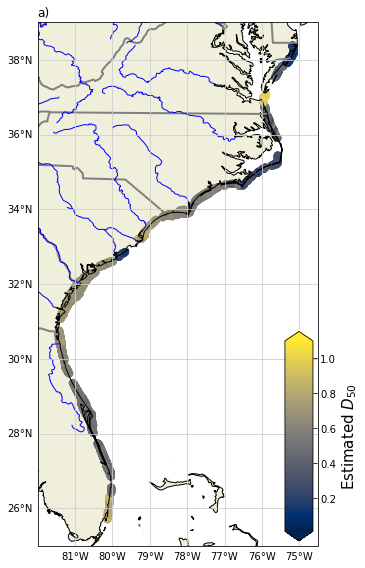

In [37]:
vmin = 0.01
vmax = 1.1
label = r'Estimated $D_{50}$'
title = 'a)'
outfile = '../model_output_plots/SEUS_d50-predict-map.jpg'

crs = ccrs.PlateCarree()
fig=plt.figure(figsize=(16,8))
ax = plt.axes(projection=crs)
ax.set_extent([-82, -74.5, 25, 39], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')

ax.add_feature(cfeature.LAND)#, zorder=100)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)#, zorder=100)
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')#, zorder=100)
gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

plt.scatter(df['longitude'],df['latitude'],50,ds_est8, cmap='cividis', 
            vmin=vmin, vmax=vmax, lw=1,edgecolors=None) #'black')
plt.title(title, loc='left')
# plt.legend(loc=4, fontsize=12)

fig.tight_layout()
cbaxes = inset_axes(ax, width="10%", height="40%", loc=4) 
cb=plt.colorbar(cax=cbaxes,extend='both')#, shrink=0.5)
cb.set_label(label, fontsize=15)

plt.savefig(outfile, dpi=300, bbox_inches='tight')

In [38]:
len(df)

5104

In [40]:
import geopandas as gpd
from shapely.geometry import Polygon, box

In [41]:
states = gpd.read_file('../../../orig_data/US_SAtlantic/usa-states-census-2014.shp')

tmpgeo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

In [42]:
FL =  states[states.NAME == "Florida"]
boundsFL = FL['geometry'].bounds.values[0]
b = box(boundsFL[0],boundsFL[1],boundsFL[2],boundsFL[3])

polygon = Polygon(list(b.exterior.coords))

data_FL = tmpgeo.clip(polygon)

In [43]:
GA =  states[states.NAME == "Georgia"]
boundsGA = GA['geometry'].bounds.values[0]
b = box(boundsGA[0],boundsGA[1],boundsGA[2],boundsGA[3])

polygon = Polygon(list(b.exterior.coords))

data_GA = tmpgeo.clip(polygon)

In [44]:
SC =  states[states.NAME == "South Carolina"]
boundsSC = SC['geometry'].bounds.values[0]
b = box(boundsSC[0],boundsSC[1],boundsSC[2],boundsSC[3])

polygon = Polygon(list(b.exterior.coords))

data_SC = tmpgeo.clip(polygon)

In [45]:
NC =  states[states.NAME == "North Carolina"]
boundsNC = NC['geometry'].bounds.values[0]
b = box(boundsNC[0],boundsNC[1],boundsNC[2],boundsNC[3])

polygon = Polygon(list(b.exterior.coords))

data_NC = tmpgeo.clip(polygon)

In [46]:
VA =  states[states.NAME == "Virginia"]
boundsVA = VA['geometry'].bounds.values[0]
b = box(boundsVA[0],boundsVA[1],boundsVA[2],boundsVA[3])

polygon = Polygon(list(b.exterior.coords))

data_VA = tmpgeo.clip(polygon)

In [47]:
print("Samples in Florida: {}".format(len(data_FL)))
print("Samples in Georgia: {}".format(len(data_GA)))
print("Samples in SC: {}".format(len(data_SC)))
print("Samples in NC: {}".format(len(data_NC)))
print("Samples in VA: {}".format(len(data_VA)))

Samples in Florida: 2155
Samples in Georgia: 1464
Samples in SC: 510
Samples in NC: 839
Samples in VA: 146


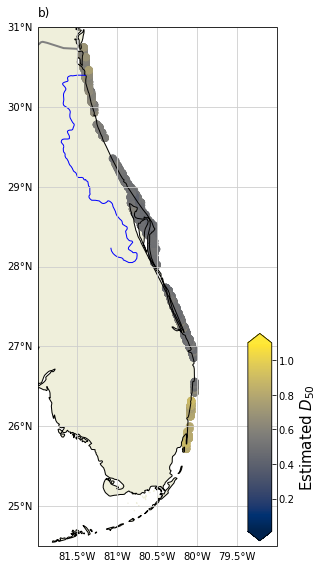

In [49]:
vmin = 0.01
vmax = 1.1
label = r'Estimated $D_{50}$'
title = 'b)'
outfile = '../model_output_plots/SEUS_d50-predict-map-FL.jpg'

crs = ccrs.PlateCarree()
fig=plt.figure(figsize=(16,8))
ax = plt.axes(projection=crs)
ax.set_extent([-82, -79, boundsFL[1], boundsFL[3]], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')

ax.add_feature(cfeature.LAND)#, zorder=100)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)#, zorder=100)
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')#, zorder=100)
gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

plt.scatter(df['longitude'],df['latitude'],50,ds_est8, cmap='cividis', 
            vmin=vmin, vmax=vmax, lw=1,edgecolors=None) #'black')
plt.title(title, loc='left')
# plt.legend(loc=4, fontsize=12)

fig.tight_layout()
cbaxes = inset_axes(ax, width="10%", height="40%", loc=4) 
cb=plt.colorbar(cax=cbaxes,extend='both')#, shrink=0.5)
cb.set_label(label, fontsize=15)

plt.savefig(outfile, dpi=300, bbox_inches='tight')

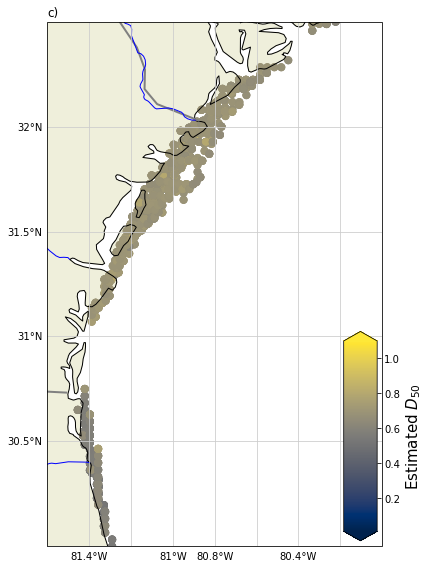

In [50]:
vmin = 0.01
vmax = 1.1
label = r'Estimated $D_{50}$'
title = 'c)'
outfile = '../model_output_plots/SEUS_d50-predict-map-GA.jpg'

crs = ccrs.PlateCarree()
fig=plt.figure(figsize=(16,8))
ax = plt.axes(projection=crs)
ax.set_extent([-81.6, -80, 30, 32.5], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')

ax.add_feature(cfeature.LAND)#, zorder=100)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)#, zorder=100)
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')#, zorder=100)
gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

plt.scatter(df['longitude'],df['latitude'],50,ds_est8, cmap='cividis', 
            vmin=vmin, vmax=vmax, lw=1,edgecolors=None) #'black')
plt.title(title, loc='left')
# plt.legend(loc=4, fontsize=12)

fig.tight_layout()
cbaxes = inset_axes(ax, width="10%", height="40%", loc=4) 
cb=plt.colorbar(cax=cbaxes,extend='both')#, shrink=0.5)
cb.set_label(label, fontsize=15)

plt.savefig(outfile, dpi=300, bbox_inches='tight')

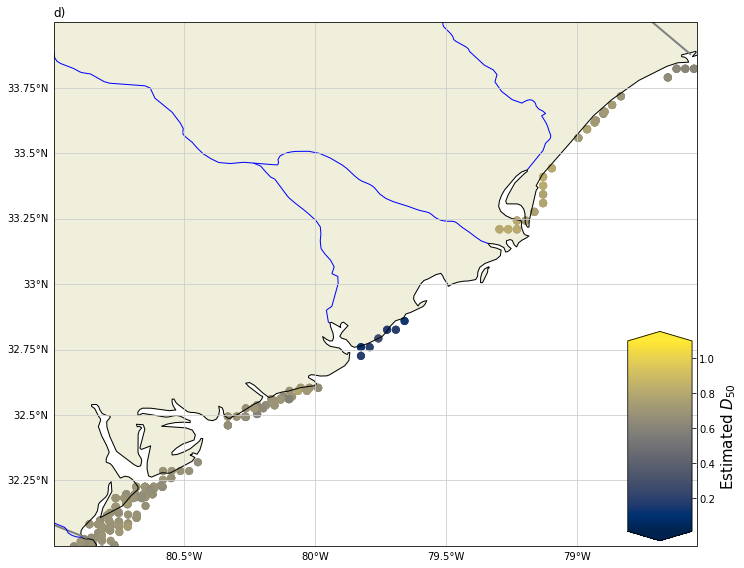

In [51]:
vmin = 0.01
vmax = 1.1
label = r'Estimated $D_{50}$'
title = 'd)'
outfile = '../model_output_plots/SEUS_d50-predict-map-SC.jpg'

crs = ccrs.PlateCarree()
fig=plt.figure(figsize=(16,8))
ax = plt.axes(projection=crs)
ax.set_extent([-81, boundsSC[2], 32, 34], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')

ax.add_feature(cfeature.LAND)#, zorder=100)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)#, zorder=100)
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')#, zorder=100)
gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

plt.scatter(df['longitude'],df['latitude'],50,ds_est8, cmap='cividis', 
            vmin=vmin, vmax=vmax, lw=1,edgecolors=None) #'black')
plt.title(title, loc='left')
# plt.legend(loc=4, fontsize=12)

fig.tight_layout()
cbaxes = inset_axes(ax, width="10%", height="40%", loc=4) 
cb=plt.colorbar(cax=cbaxes,extend='both')#, shrink=0.5)
cb.set_label(label, fontsize=15)

plt.savefig(outfile, dpi=300, bbox_inches='tight')

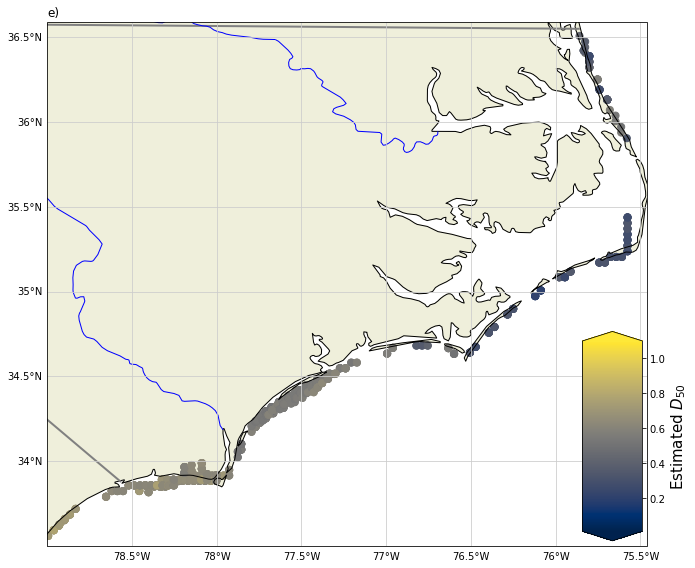

In [52]:
vmin = 0.01
vmax = 1.1
label = r'Estimated $D_{50}$'
title = 'e)'
outfile = '../model_output_plots/SEUS_d50-predict-map-NC.jpg'

crs = ccrs.PlateCarree()
fig=plt.figure(figsize=(16,8))
ax = plt.axes(projection=crs)
ax.set_extent([-79, boundsNC[2], 33.5, boundsNC[3]], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')

ax.add_feature(cfeature.LAND)#, zorder=100)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)#, zorder=100)
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')#, zorder=100)
gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

plt.scatter(df['longitude'],df['latitude'],50,ds_est8, cmap='cividis', 
            vmin=vmin, vmax=vmax, lw=1,edgecolors=None) #'black')
plt.title(title, loc='left')
# plt.legend(loc=4, fontsize=12)

fig.tight_layout()
cbaxes = inset_axes(ax, width="10%", height="40%", loc=4) 
cb=plt.colorbar(cax=cbaxes,extend='both')#, shrink=0.5)
cb.set_label(label, fontsize=15)

plt.savefig(outfile, dpi=300, bbox_inches='tight')

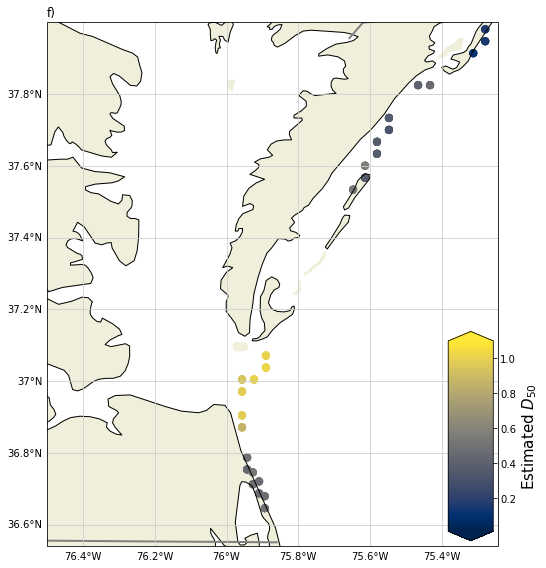

In [53]:
vmin = 0.01
vmax = 1.1
label = r'Estimated $D_{50}$'
title = 'f)'
outfile = '../model_output_plots/SEUS_d50-predict-map-VA.jpg'

crs = ccrs.PlateCarree()
fig=plt.figure(figsize=(16,8))
ax = plt.axes(projection=crs)
ax.set_extent([-76.5, boundsVA[2], boundsVA[1], 38], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')

ax.add_feature(cfeature.LAND)#, zorder=100)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)#, zorder=100)
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')#, zorder=100)
gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

plt.scatter(df['longitude'],df['latitude'],50,ds_est8, cmap='cividis', 
            vmin=vmin, vmax=vmax, lw=1,edgecolors=None) #'black')
plt.title(title, loc='left')
# plt.legend(loc=4, fontsize=12)

fig.tight_layout()
cbaxes = inset_axes(ax, width="10%", height="40%", loc=4) 
cb=plt.colorbar(cax=cbaxes,extend='both')#, shrink=0.5)
cb.set_label(label, fontsize=15)

plt.savefig(outfile, dpi=300, bbox_inches='tight')

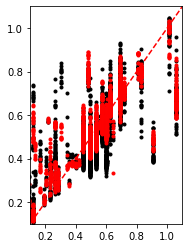

In [25]:
plt.subplot(121)
plt.plot(df['d50'], ds_est4, 'k.')
plt.plot(df['d50'], ds_est8, 'r.')

# plt.plot(df['d50'], (ds_est8+ds_est8)/2, 'bo')
plt.xlim(.1,1.1); plt.ylim(.1,1.1)
xl = plt.xlim()
plt.plot(xl,xl,'r--')

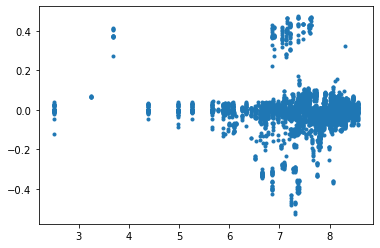

In [15]:
plt.plot(df['tp'], df['d50']- ds_est8, '.')
plt.plot(df['mstr'], df['d50']- ds_est8, '.')

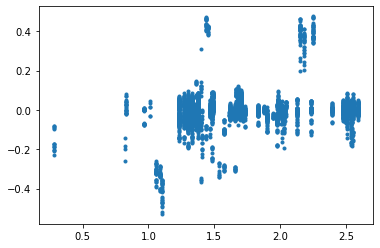